- Reference
  - https://blog.amedama.jp/entry/2019/01/29/235642
  - 組み込みの交差検証

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import xgboost as xgb

In [3]:
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

In [9]:
#dtrain = xgb.DMatrix(X_train, label=y_train)
#dtest = xgb.DMatrix(X_test, label=y_test)

dtrain = xgb.DMatrix(X, label=y)

In [10]:
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
}

# evals = [(dtrain, 'train'), (dtest, 'eval')]
# evals_result = {}

# bst = xgb.train(xgb_params,
#                 dtrain,
#                 num_boost_round=1000,
#                 early_stopping_rounds=10,
#                 evals=evals,
#                 evals_result=evals_result,
#                 feval=feval_accuracy)

history = xgb.cv(xgb_params,
                 dtrain,
                 num_boost_round=1000,
                 early_stopping_rounds=10,
                 nfold=10,
                 stratified=True,
                 verbose_eval=True,)

[0]	train-logloss:0.46191+0.00201	test-logloss:0.48262+0.01761
[1]	train-logloss:0.33019+0.00133	test-logloss:0.36473+0.02390
[2]	train-logloss:0.24479+0.00177	test-logloss:0.29025+0.03124
[3]	train-logloss:0.18546+0.00180	test-logloss:0.23864+0.03532
[4]	train-logloss:0.14318+0.00183	test-logloss:0.20102+0.03969
[5]	train-logloss:0.11288+0.00169	test-logloss:0.17490+0.03912
[6]	train-logloss:0.09082+0.00141	test-logloss:0.15802+0.04489
[7]	train-logloss:0.07417+0.00159	test-logloss:0.14257+0.04424
[8]	train-logloss:0.06181+0.00160	test-logloss:0.13379+0.04676
[9]	train-logloss:0.05210+0.00148	test-logloss:0.12532+0.04805
[10]	train-logloss:0.04419+0.00147	test-logloss:0.11680+0.04772
[11]	train-logloss:0.03785+0.00146	test-logloss:0.11072+0.04839
[12]	train-logloss:0.03287+0.00125	test-logloss:0.10662+0.04719
[13]	train-logloss:0.02892+0.00100	test-logloss:0.10493+0.04944
[14]	train-logloss:0.02590+0.00101	test-logloss:0.10352+0.05133
[15]	train-logloss:0.02328+0.00090	test-logloss:0.

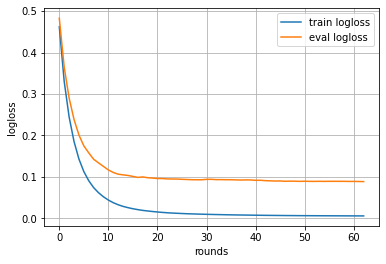

In [11]:
train_metric = history['train-logloss-mean']
plt.plot(train_metric, label='train logloss')

eval_metric = history['test-logloss-mean']
plt.plot(eval_metric, label='eval logloss')

plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('logloss')
plt.show()